https://drive.google.com/drive/folders/1NtLjHhZNR-pmciXJwIRE9ac7Js-G-SHj

In [4]:
import xarray as xr


ds = xr.open_dataset("trim-sc_fl_03_2021.nc4", drop_variables="time_bounds")

In [18]:
ds

<xarray.Dataset>
Dimensions:      (Layer: 8, LayerInterf: 9, m: 181, n: 218, time: 745)
Coordinates:
  * Layer        (Layer) float32 -0.0625 -0.1875 -0.3125 ... -0.8125 -0.9375
  * LayerInterf  (LayerInterf) float32 0.0 -0.125 -0.25 ... -0.75 -0.875 -1.0
    latitude     (m, n) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    longitude    (m, n) float32 nan nan nan nan nan nan ... nan nan nan nan nan
  * m            (m) float32 -48.87 -48.87 -48.86 -48.85 ... -47.1 -47.09 -47.09
  * n            (n) float32 -28.62 -28.62 -28.61 -28.6 ... -26.48 -26.47 -26.47
  * time         (time) datetime64[ns] 2021-03-01 ... 2021-04-01
Data variables:
    depth        (m, n) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    velocity_x   (time, Layer, m, n) float32 ...
    velocity_y   (time, Layer, m, n) float32 ...
    waterlevel   (time, m, n) float32 ...
Attributes: (12/25)
    title:                         NetCDF created from NEFIS-file trim-sc_fl_...
    institution:                   
    source:                        Delft3D trim file
    history:                       Sun Jul  3 17:05:51 2022: ncks -4 -L 1 tri...
    references:                    http://svn.oss.deltares.nl
    email:                         
    ...                            ...
    geospatial_lon_units:          dergees_east
    geospatial_vertical_min:       2.2039968967437744
    geospatial_vertical_max:       547.0967407226562
    geospatial_vertical_units:     m
    geospatial_vertical_positive:  down
    NCO:                           netCDF Operators version 5.0.7 (Homepage =...

In [17]:
ds["time"][0].to_numpy(), ds["time"][-1].to_numpy()

(array('2021-03-01T00:00:00.000000000', dtype='datetime64[ns]'),
 array('2021-04-01T00:00:00.000000000', dtype='datetime64[ns]'))

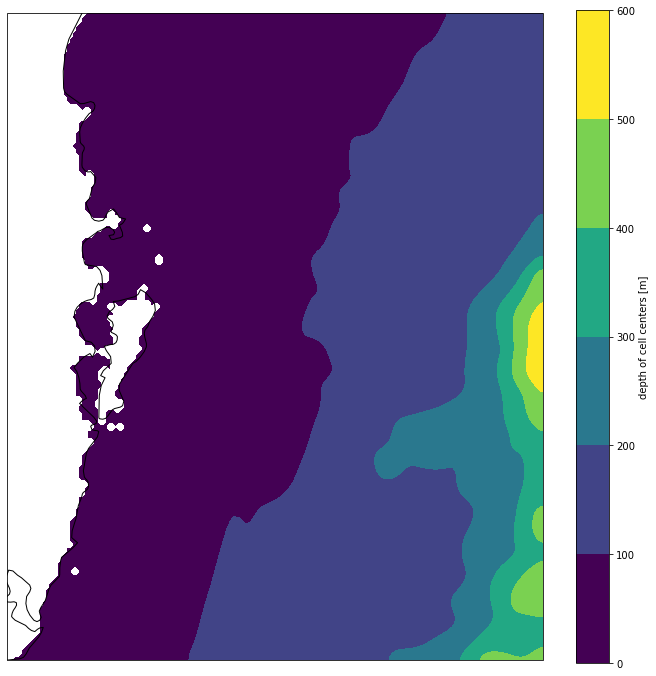

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=(12, 12),
)
ds["depth"].T.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines();